# Critical Heat Flux Prediction 🔥🎇

### Overview to Dataset

* `Overview`<br>
The dataset used in this study consists of 1865 test cases and covers a wide range of flow conditions. The focus is on the critical heat flux (CHF) and the dataset includes input features such as pressure, mass flux, equilibrium quality, channel diameter, and heated length. The target/output is the CHF `(x_e_out)`, and the dataset includes data from round tubes, annuli, and one-side heated plates. The dataset is used to train and validate machine learning models for predicting CHF.

* `Key points`
    - The dataset includes 1865 test cases with a wide range of flow conditions.
    - Input features include pressure, mass flux, equilibrium quality, channel diameter, and heated length.
    - The target/output is the critical heat flux (CHF) x_e_out .
    - The dataset includes data from round tubes, annuli, and one-side heated plates.
    - The dataset is used to train and validate machine learning models for predicting CHF.

* <p style="color: lightblue; font-size:25px">Preprocessing <br></p>
In this case study, `standardization` is applied to the input vectors of `pressure, mass flux, equivalent diameter, heated diameter, and heated length`. This preprocessing step, guided by domain knowledge, ensures that the input variables are scaled appropriately and have `zero mean and unity variance,` which can improve the performance of machine learning models.

* Author Suggested ML exploration <br>

* Uncertainty Quantifications: The authors suggest that future research should focus on incorporating uncertainty quantifications using ``Bayesian machine learning`` techniques. This would allow for a better understanding of the uncertainties associated with the predictions made by the hybrid framework, providing more reliable and robust results.

* Transient Predictions: Another area of future interest mentioned by the authors is the application of`` time series machine learning techniques`` for transient predictions. This would enable the hybrid framework to make accurate predictions in dynamic scenarios, where the conditions are changing over time. By incorporating transient predictions, the framework can provide valuable insights into the behavior of thermal systems under varying conditions.

* Transfer Learning: The authors highlight `transfer learning` as a promising machine learning technique for achieving better extrapolation capabilities. By leveraging algorithms like ``Markov logic networks or Bayesian networks``, transfer learning allows for the transfer of knowledge from one domain to another. This can be particularly useful in thermal systems, where domain knowledge and experimental data are available, as it can enhance the predictive capabilities of the hybrid framework.

* Limitations of the Dataset: Overall, the limitations of the dataset include its small size, limited coverage of plate data, exclusion of a geometry indicator, uncertainties in experimental data, and a restricted range of flow conditions. These limitations should be considered when using the dataset for predicting CHF

* <b>Model Architectures and Accuracy</b>

The document mentions two model architectures used to predict the output variable: <p style="color: yellow">Neural Network (NN) and Random Forest (RF).</p>

For the Neural Network (NN) model, the architecture used was <p style="color: green">6/50/50/50/1</p>, which means it had 6 units in the input layer, 50 units in each of the 3 hidden layers, and 1 unit in the output layer. The activation function used was <p style="background-color: yellow; color: black">ReLU, and no regularization was applied. The accuracy of the NN model is not explicitly mentioned in the given document.</p>

For the Random Forest (RF) model, the architecture used was <p style="color: yellow">100 trees/estimators, with 50%-70% features in each individual tree. No regularization was applied to the RF model.</p> The accuracy of the RF model is not explicitly mentioned in the given document.

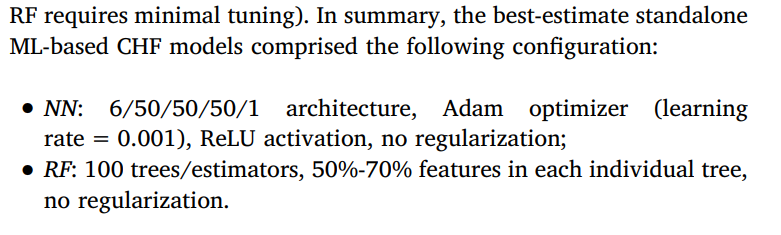

* `Target Variable` <br>
x_e_out refers to the equilibrium (or thermodynamic) quality of the output in the physics-informed machine learning-aided framework. It is one of the input features used in the ML component of the framework. The ML algorithm learns from the mismatch between the actual output and the output predicted by the prior model, which is based on domain knowledge. The equilibrium quality represents the ratio of the mass of vapor to the total mass of the two-phase mixture at a given point in the system.

---

### EDA
imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling  import ProfileReport #make sure you have installed this in your environment
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError as RMSE

In [2]:
data_chf = pd.read_csv('../dataset/Data_CHF_Zhao_2020_ATE.csv')

In [3]:
data_chf.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,1,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,2,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,3,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,4,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,5,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0


In [3]:
data_chf.shape

(1865, 10)

In [8]:
data_chf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1865 non-null   int64  
 1   author               1865 non-null   object 
 2   geometry             1865 non-null   object 
 3   pressure [MPa]       1865 non-null   float64
 4   mass_flux [kg/m2-s]  1865 non-null   int64  
 5   x_e_out [-]          1865 non-null   float64
 6   D_e [mm]             1865 non-null   float64
 7   D_h [mm]             1865 non-null   float64
 8   length [mm]          1865 non-null   int64  
 9   chf_exp [MW/m2]      1865 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 145.8+ KB


In [9]:
null_val = data_chf.isnull().sum(axis=0) * 100 / data_chf.shape[0]
null_val.sort_values(ascending=False)   

id                     0.0
author                 0.0
geometry               0.0
pressure [MPa]         0.0
mass_flux [kg/m2-s]    0.0
x_e_out [-]            0.0
D_e [mm]               0.0
D_h [mm]               0.0
length [mm]            0.0
chf_exp [MW/m2]        0.0
dtype: float64

In [10]:
data_chf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1865.0,NaN,NaN,NaN,933.0,538.523444,1.0,467.0,933.0,1399.0,1865.0
author,1865,10,Thompson,1202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geometry,1865,3,tube,1439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure [MPa],1865.0,NaN,NaN,NaN,10.010949,4.282715,0.1,6.89,10.34,13.79,20.68
mass_flux [kg/m2-s],1865.0,NaN,NaN,NaN,2862.647721,1656.412247,0.0,1519.0,2590.0,3933.0,7975.0
x_e_out [-],1865.0,NaN,NaN,NaN,0.016179,0.117575,-0.8667,-0.0483,0.0244,0.1006,0.232
D_e [mm],1865.0,NaN,NaN,NaN,9.417212,6.333807,1.0,5.6,8.5,11.1,37.5
D_h [mm],1865.0,NaN,NaN,NaN,16.167721,21.18287,1.0,5.6,10.3,15.2,120.0
length [mm],1865.0,NaN,NaN,NaN,911.340483,726.718974,10.0,432.0,625.0,1778.0,3048.0
chf_exp [MW/m2],1865.0,NaN,NaN,NaN,3.854638,1.985535,0.8,2.4,3.5,4.8,19.3


In [11]:
numerical_feature = [feature for feature in data_chf.columns if data_chf[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(data_chf[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in data_chf.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))

Numerical Features Count 8
Categorical feature Count 2
Discrete feature Count 0
Continuous feature Count 8


In [12]:
data_chf['geometry'].value_counts()

geometry
tube       1439
annulus     378
plate        48
Name: count, dtype: int64

In [13]:
data_chf.isna().sum()

id                     0
author                 0
geometry               0
pressure [MPa]         0
mass_flux [kg/m2-s]    0
x_e_out [-]            0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
chf_exp [MW/m2]        0
dtype: int64

In [14]:
data_chf.isnull().sum()

id                     0
author                 0
geometry               0
pressure [MPa]         0
mass_flux [kg/m2-s]    0
x_e_out [-]            0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
chf_exp [MW/m2]        0
dtype: int64

In [15]:
# Checking duplicates
data_chf.duplicated().sum()

0

In [16]:
[col for col in data_chf if data_chf[col].nunique()==1]

[]

In [4]:
profile = ProfileReport(data_chf, title='CHF Profiling Report', explorative=True)

In [5]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile.to_file("CHF_profiling_report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Observations:<br>
* The dataset includes 1865 test cases with a wide range of flow conditions.
* Input features include pressure, mass flux, equilibrium quality, channel diameter, and heated length.
* The target/output is the critical heat flux (CHF) x_e_out .
* The dataset includes data from round tubes, annuli, and one-side heated plates.

### Preprocessing <br>
* `id` and `author` columns can be dropped as three different authors have contributed to gather 3 different geometrical study data.

In [3]:

data_chf.drop(["id","author"],axis=1,inplace=True)

The `geometry indicator` is an additional feature that is added to the input data. However, it has been shown that this feature does not have a significant impact on the application being discussed. In other words, the geometry indicator does not play a crucial role in the analysis or prediction being performed. Therefore, its inclusion in the input feature dimension is considered to be of trivial importance.


In [4]:
data_chf.drop(["geometry"],axis=1,inplace=True)

In [6]:
data_chf.columns

Index(['pressure [MPa]', 'mass_flux [kg/m2-s]', 'x_e_out [-]', 'D_e [mm]',
       'D_h [mm]', 'length [mm]', 'chf_exp [MW/m2]'],
      dtype='object')

#### Visualizing the data distribution of the input features and the target variable.

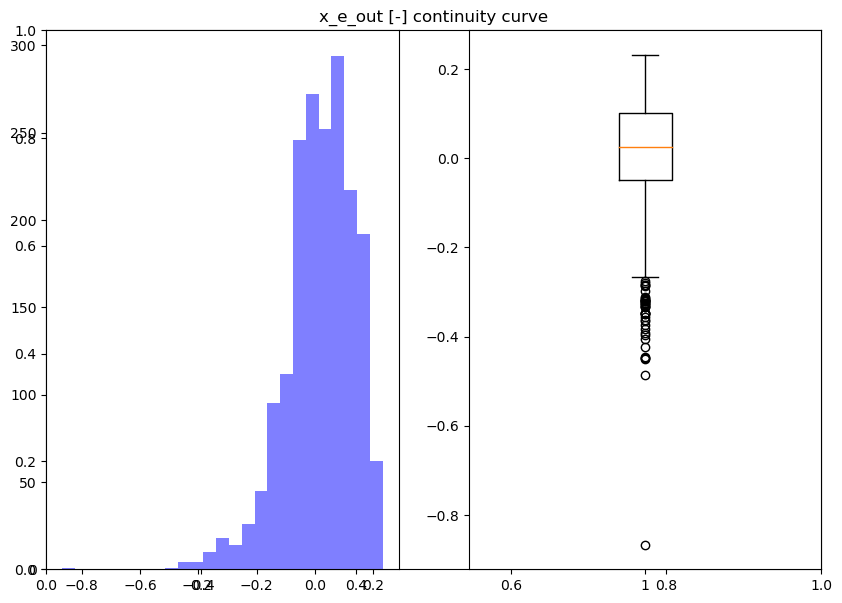

In [20]:
figs = plt.figure(figsize=(10,7))
plt.title("x_e_out [-] continuity curve")
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = data_chf["x_e_out [-]"]
plt.xlabel("")
ax1.hist(x, bins=25, color="blue", alpha=0.5)
ax2.boxplot(x);

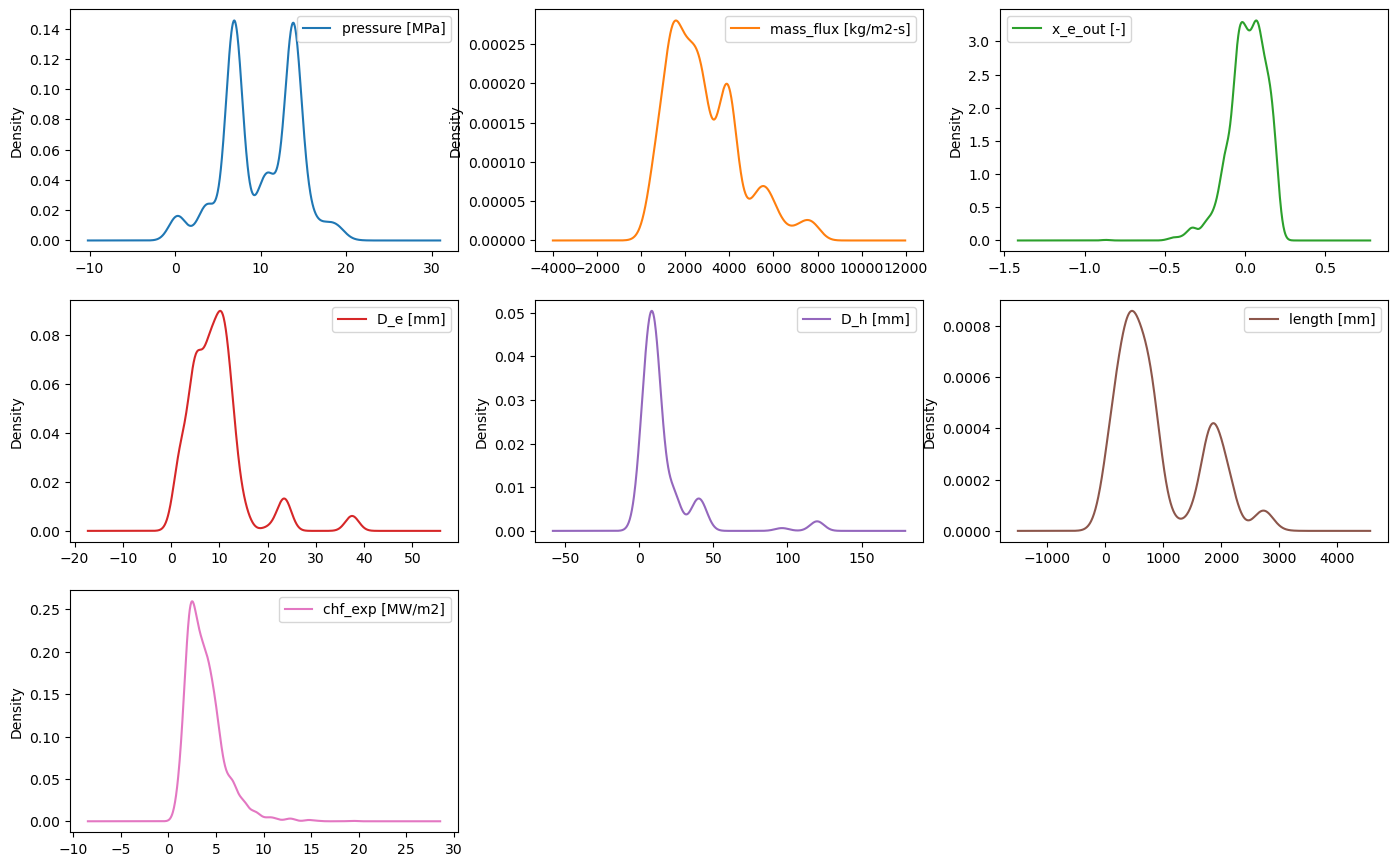

In [21]:
data_chf.plot(kind="density", 
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

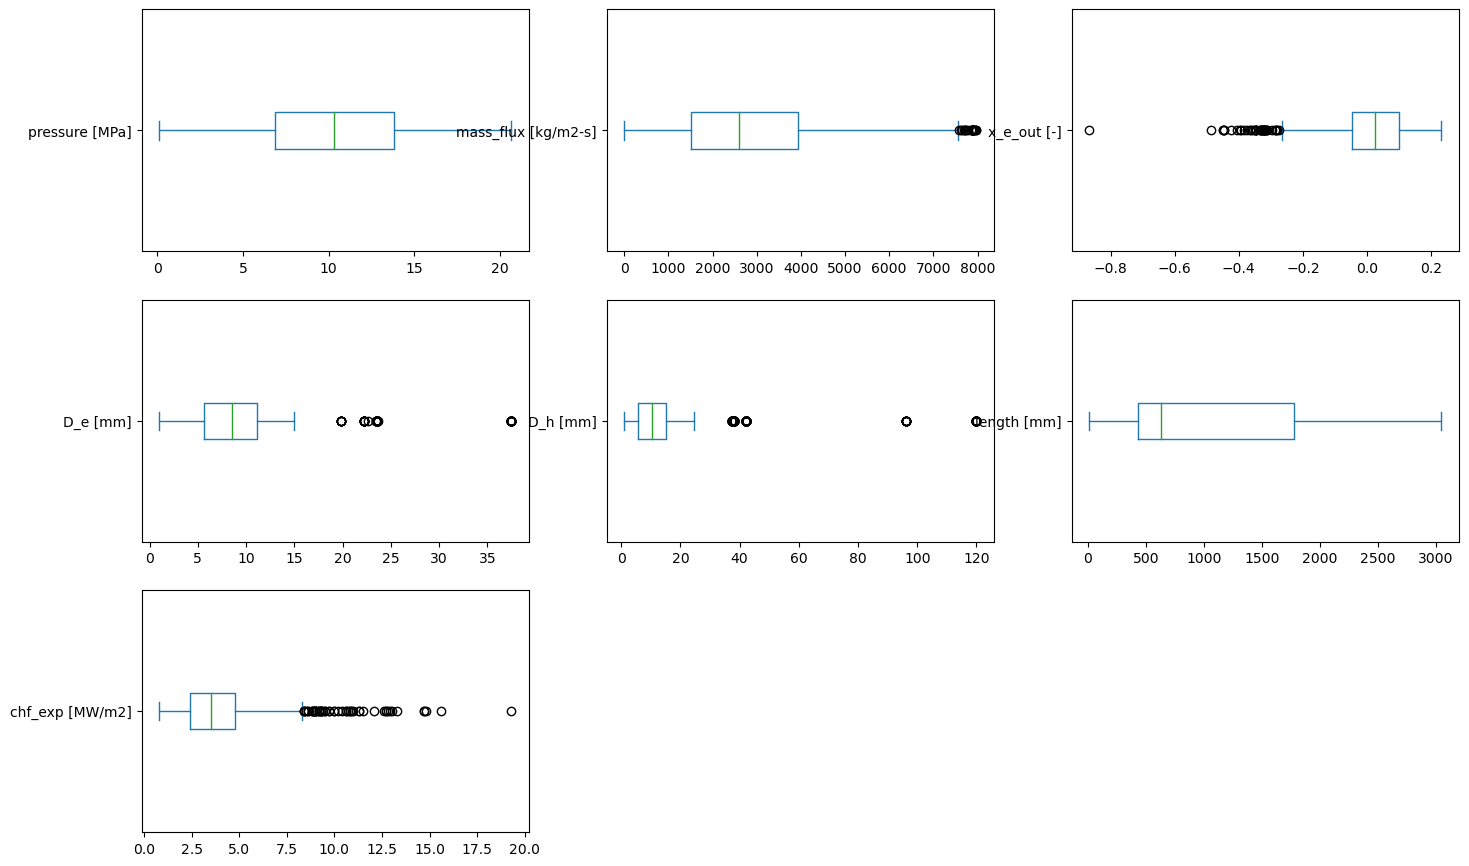

In [22]:
data_chf.plot(kind="box", 
                vert=False, # makes horizontal plots instead of vertical
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

In [14]:
for i in data_chf.drop('x_e_out [-]',axis=1).columns:
    
    IQR=data_chf[i].quantile(0.75)-data_chf[i].quantile(0.25)
    lower_bridge=data_chf[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=data_chf[i].quantile(0.75)+(IQR*1.5)
    
    outs = []
    
    for j in data_chf[i]:
        if j<lower_bridge:
            outs.append(j)
    
    for k in data_chf[i]:
        if k>upper_bridge:
            outs.append(k)

    print(f'The percentage of outliers in {i}:',(len(outs)/len(data_chf)*100),'%')

The percentage of outliers in pressure [MPa]: 0.0 %
The percentage of outliers in mass_flux [kg/m2-s]: 1.3404825737265416 %
The percentage of outliers in D_e [mm]: 7.453083109919572 %
The percentage of outliers in D_h [mm]: 13.083109919571045 %
The percentage of outliers in length [mm]: 0.0 %
The percentage of outliers in chf_exp [MW/m2]: 3.0026809651474533 %


<p style="color: yellow">Some outliers are present in the data.</p> 

<Axes: >

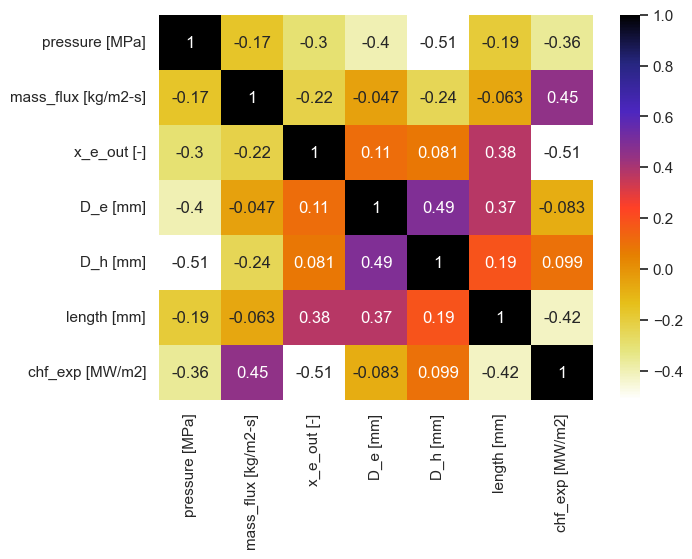

In [10]:
plt.figure(figsize=(7,5))
sns.set()
sns.heatmap(data_chf.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [12]:
def vif_scores(df,target,e=False):
    vif = pd.DataFrame()
    vif["Features"] = df.drop(target,axis=1).columns
    vif["VIF Score"] = [variance_inflation_factor(df.drop(target,axis=1).values, i) for i in range(df.drop(target,axis=1).shape[1])]
    # Format the VIF scores without "e" notation
    if e==True:
        vif["VIF Score"] = ['%.2f' % elem for elem in vif["VIF Score"]]
    return(vif.sort_values(by='VIF Score',ascending=False))

In [13]:
vif_scores(data_chf,'x_e_out [-]',True)

,Features,VIF Score
5,chf_exp [MW/m2],6.51
1,mass_flux [kg/m2-s],6.01
2,D_e [mm],4.57
4,length [mm],3.25
0,pressure [MPa],3.20
3,D_h [mm],2.72


<p style="color:yellow">Not much high Correlation between the features and the target variable.</p>

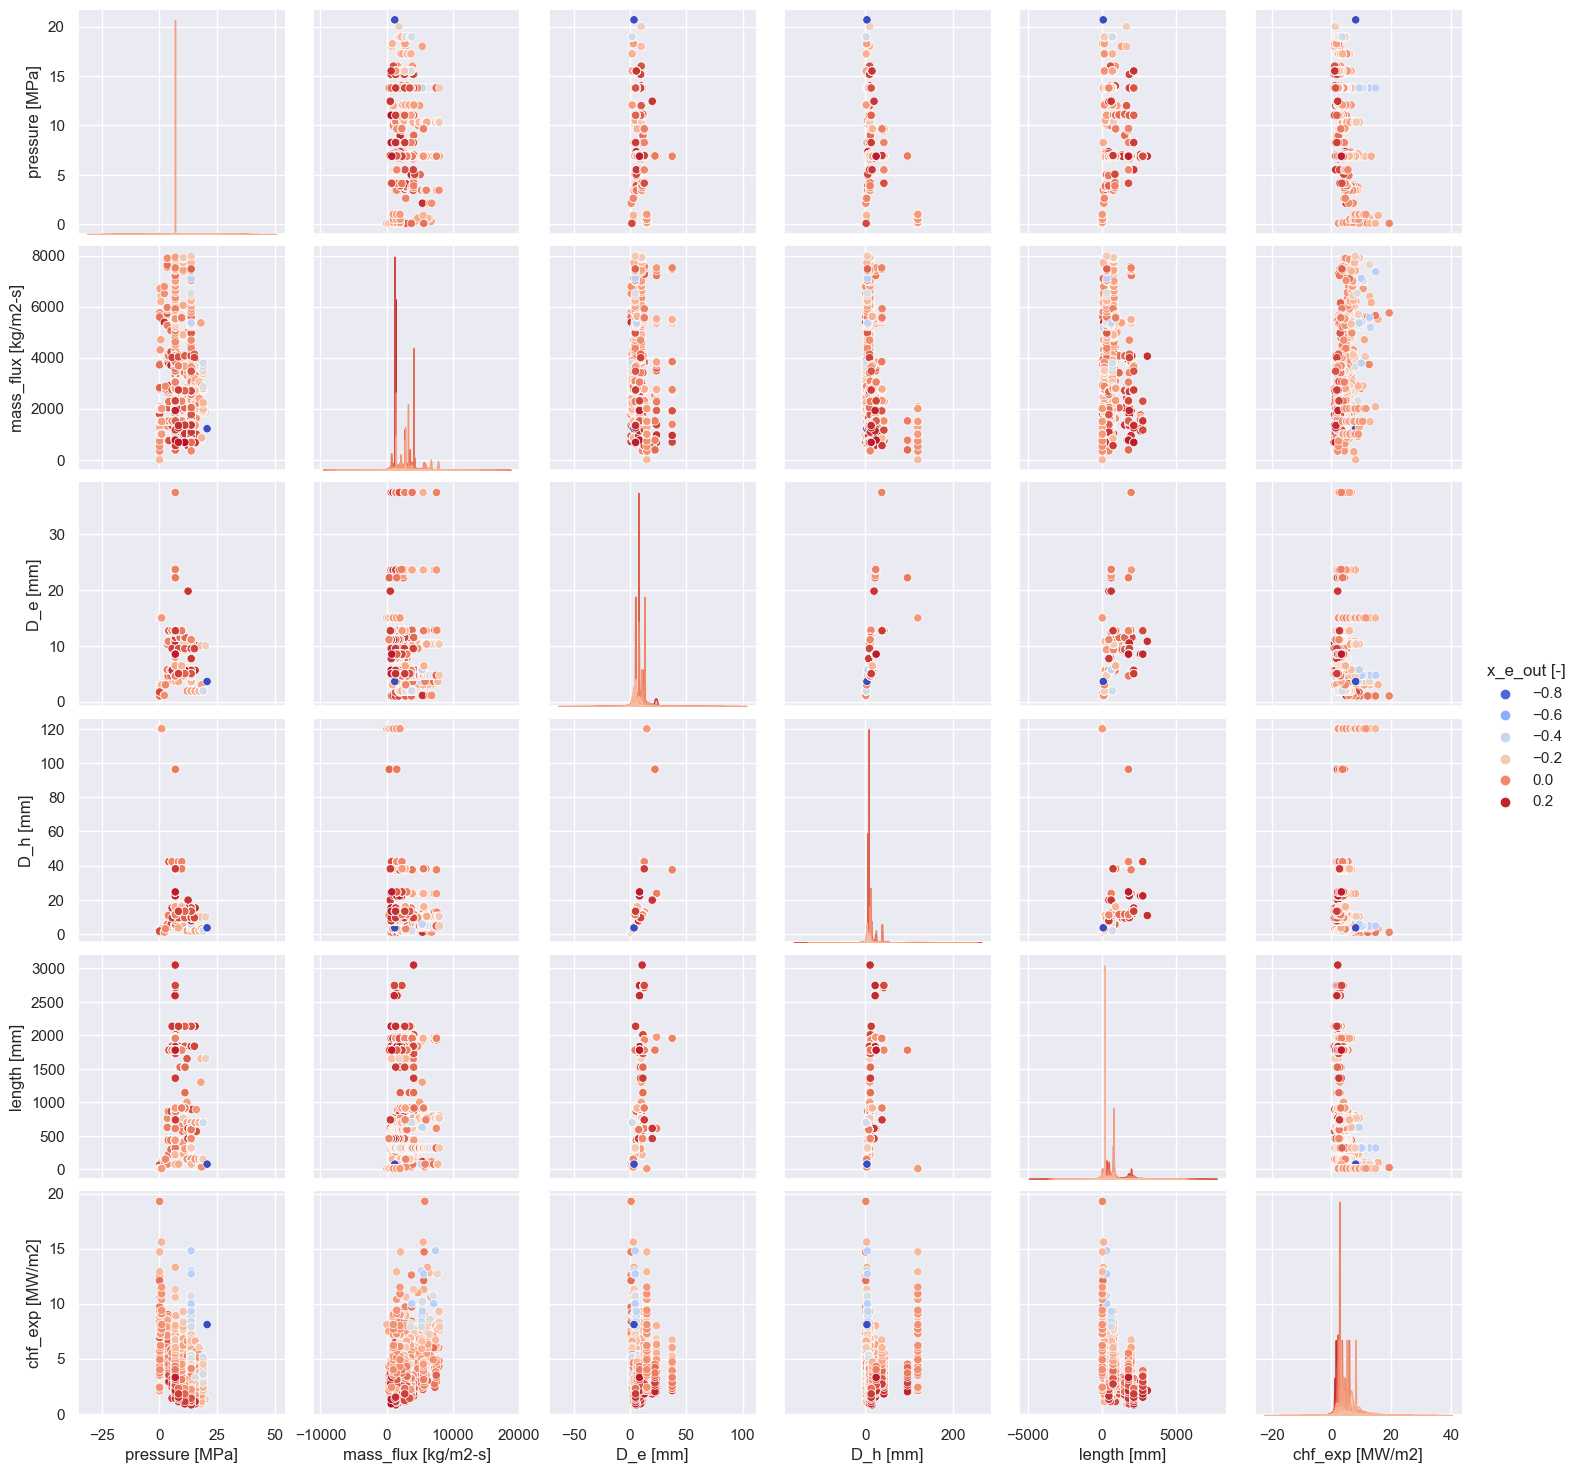

In [15]:
sns.pairplot(data_chf,hue='x_e_out [-]',palette='coolwarm')

### Preprocessing <br>
* As suggested in the paper, we need to gain <p style="color: yellow; font-size:20px">Unity Variance and Zero Mean (approx)</p>

In [7]:
# Mean of all the columns
data_chf.mean()

pressure [MPa]           10.010949
mass_flux [kg/m2-s]    2862.647721
x_e_out [-]               0.016179
D_e [mm]                  9.417212
D_h [mm]                 16.167721
length [mm]             911.340483
chf_exp [MW/m2]           3.854638
dtype: float64

In [20]:
# Variance of all the columns
data_chf.var().transform(np.log).sort_values(ascending=False)

mass_flux [kg/m2-s]    14.824818
length [mm]            13.177080
D_h [mm]                6.106386
D_e [mm]                3.691803
pressure [MPa]          2.909174
chf_exp [MW/m2]         1.371777
x_e_out [-]            -4.281361
dtype: float64

In [21]:
data_chf.var().sort_values(ascending=False)

mass_flux [kg/m2-s]    2.743702e+06
length [mm]            5.281205e+05
D_h [mm]               4.487140e+02
D_e [mm]               4.011711e+01
pressure [MPa]         1.834165e+01
chf_exp [MW/m2]        3.942351e+00
x_e_out [-]            1.382383e-02
dtype: float64

In [5]:
datacopy = data_chf.copy()

In [6]:
# We need to standardize the data in such a way that mean becomes 0 and standard deviation becomes 1 approximately
from sklearn.preprocessing import StandardScaler
datacopy = datacopy.drop('x_e_out [-]',axis=1)
scaler = StandardScaler()
scaler.fit(datacopy)
scaled_features = scaler.transform(datacopy)

In [11]:
# Save the scaler object for future use
pickle.dump(scaler, open("../model/scaler.pkl", "wb"))

In [8]:
# To put the scaled features back into a pandas dataframe...
# Let's create a dataframe of the scaled features
df_feat = pd.DataFrame(scaled_features,columns=datacopy.columns)
df_feat.mean()

pressure [MPa]         5.486228e-16
mass_flux [kg/m2-s]    3.047904e-17
D_e [mm]               3.047904e-16
D_h [mm]              -1.371557e-16
length [mm]            4.571857e-17
chf_exp [MW/m2]        6.095809e-17
dtype: float64

In [13]:
data_chf.describe().T

,count,mean,std,min,25%,50%,75%,max
pressure [MPa],1865.0,10.010949,4.282715,0.1000,6.8900,10.3400,13.7900,20.680
mass_flux [kg/m2-s],1865.0,2862.647721,1656.412247,0.0000,1519.0000,2590.0000,3933.0000,7975.000
x_e_out [-],1865.0,0.016179,0.117575,-0.8667,-0.0483,0.0244,0.1006,0.232
D_e [mm],1865.0,9.417212,6.333807,1.0000,5.6000,8.5000,11.1000,37.500
D_h [mm],1865.0,16.167721,21.182870,1.0000,5.6000,10.3000,15.2000,120.000
length [mm],1865.0,911.340483,726.718974,10.0000,432.0000,625.0000,1778.0000,3048.000
chf_exp [MW/m2],1865.0,3.854638,1.985535,0.8000,2.4000,3.5000,4.8000,19.300


In [14]:
df_feat.describe().T

,count,mean,std,min,25%,50%,75%,max
pressure [MPa],1865.0,5.486228e-16,1.000268,-2.314795,-0.728927,0.076853,0.882633,2.491857
mass_flux [kg/m2-s],1865.0,3.047904e-17,1.000268,-1.728685,-0.811397,-0.164646,0.646360,3.087229
D_e [mm],1865.0,3.047904e-16,1.000268,-1.329290,-0.602834,-0.144851,0.265755,4.434982
D_h [mm],1865.0,-1.371557e-16,1.000268,-0.716229,-0.499014,-0.277077,-0.045696,4.903024
length [mm],1865.0,4.571857e-17,1.000268,-1.240620,-0.659772,-0.394124,1.192885,2.940934
chf_exp [MW/m2],1865.0,6.095809e-17,1.000268,-1.538858,-0.732814,-0.178659,0.476252,7.781027


<p style="color: orange; font-size:30px">We have succesfully pre-processed the data!</p>

### Splitting the data into train and test sets

In [9]:
# We need to split data into Train | Val | Test
# Train - 80%
# Val - 15%
# Test - 5%
# WE need to first combine df_feat and data_chf['x_e_out [-]'] 
data = pd.concat([df_feat,data_chf['x_e_out [-]']],axis=1) # Not concatenated properly - need to check....
data.shape

(1865, 7)

In [10]:
data.columns

Index(['pressure [MPa]', 'mass_flux [kg/m2-s]', 'D_e [mm]', 'D_h [mm]',
       'length [mm]', 'chf_exp [MW/m2]', 'x_e_out [-]'],
      dtype='object')

In [11]:
# Splitting as planned 
X = data.drop('x_e_out [-]',axis=1)
y = data['x_e_out [-]']


---

                                                Author Suggested NN Model

---

In [18]:
X_Train, X_val_test, y_Train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=101, shuffle=True)
# Note that we are Shuffleing the data.............................................................^^^^^^^^^^^^

# Now the Val and Test Splits 
X_Val, X_Test, y_Val, y_Test = train_test_split(X_val_test, y_val_test, test_size=0.3, random_state=101, shuffle=True)

In [19]:
X_Train.shape, X_Val.shape, X_Test.shape

((1492, 6), (261, 6), (112, 6))

|  80%  |   30% ----- First Split <br>
That 30 % is further split into 70% and 30% for validation and test sets respectively.

In [20]:
y_Train.shape, y_Val.shape, y_Test.shape

((1492,), (261,), (112,))

### Model Building NN

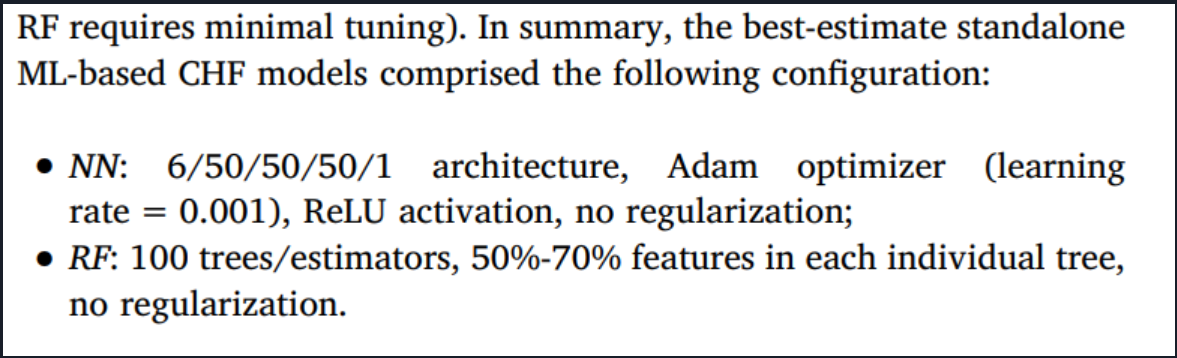

In [17]:
auth_model = Sequential()
auth_model.add(Dense(6,input_dim=6,activation='relu'))
auth_model.add(Dense(50,activation='relu'))
auth_model.add(Dense(50,activation='relu'))
auth_model.add(Dense(50,activation='relu'))
auth_model.add(Dense(1,activation='sigmoid'))

In [18]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [19]:
auth_model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=[RMSE()])

In [20]:
auth_history = auth_model.fit(x=X_Train,y=y_Train,epochs=600,validation_data=(X_Val,y_Val),batch_size=32)

Epoch 1/600
47/47 [==============================] - 2s 9ms/step - loss: 0.1276 - root_mean_squared_error: 0.3572 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 2/600
47/47 [==============================] - 0s 4ms/step - loss: 0.0166 - root_mean_squared_error: 0.1287 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1209
Epoch 3/600
47/47 [==============================] - 0s 4ms/step - loss: 0.0139 - root_mean_squared_error: 0.1180 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1186
Epoch 4/600
47/47 [==============================] - 0s 4ms/step - loss: 0.0135 - root_mean_squared_error: 0.1162 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1166
Epoch 5/600
47/47 [==============================] - 0s 4ms/step - loss: 0.0130 - root_mean_squared_error: 0.1140 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1123
Epoch 6/600
47/47 [==============================] - 0s 4ms/step - loss: 0.0120 - root_mean_squared_error: 0.1097 - val_loss: 0.0110 - val_root_m

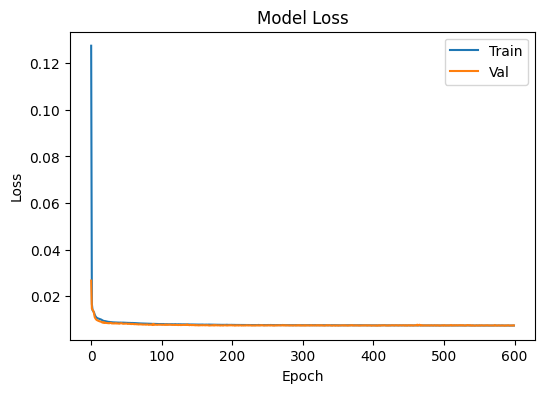

In [23]:
# Plotting the loss
plt.figure(figsize=(6,4))
plt.plot(auth_history.history['loss'])
plt.plot(auth_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [22]:
# Test model prediction on Test set 
y_pred = auth_model.predict(X_Test)
# Chekc the RMSE using keras.metrics.RootMeanSquaredError()
rmse = RMSE()
rmse.update_state(y_Test,y_pred)
print('RMSE:',rmse.result().numpy()) 


4/4 [==============================] - 0s 3ms/step
RMSE: 0.09565127


In [27]:
auth_model.save('../Model/CHF_auth_model.h5')

p:\Anaconda\envs\jupy\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* Applying the same architecture as mentioned in the paper... we get RMSE of `0.09` !
* Maybe the `Shuffling` worked to break the row-wise correlation... 
* Following pre-processing was done while training this auth_model:
    - `Standardization` of the input features. <span style="color:yellow">Zero Mean and Unity Variance.</span>
    - `Shuffling` of the data. 
    - `Splitting` of the data into train and test sets and <span style="color:yellow">Hold out Validation set.</span>
    - `Training` of the model. <span style="color:yellow"> NN Architecture: 6|50|50|50|1 </span>
    - `Evaluation` of the model on the test set. <span style="color:yellow"> RMSE: 0.09 </span>

---

### <p style="color: darkgrey;font-size: 25px"><b>Let's Experiment with different model architectures and see if we can get better results.</b></p>

Model 1: Basic Model

In [25]:
model1 = Sequential()
# adding first layer and using relu as an activation function
model1.add(Dense(64, input_shape=(X_Train.shape[-1],), activation='relu'))
# adding second layer to the sequential model
model1.add(Dense(128, activation='relu'))
# Adding third layer 
model1.add(Dense(32, activation='relu'))
# Output layer with linear activation function
model1.add(Dense(1, activation='linear'))

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                448       
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12929 (50.50 KB)
Trainable params: 12929 (50.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
metrics = [keras.metrics.RootMeanSquaredError(name="rmse")]

### Compiling the model
### choosing an appropirate optimiser and loss function
model1.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='mean_squared_error',
              metrics=metrics)

In [28]:
### Training the model
epochs = 200
batch_size = 32
history = model1.fit(X_Train.values,y_Train, validation_data = (X_Val.values, y_Val), epochs=epochs, batch_size=batch_size)

Epoch 1/200
47/47 [==============================] - 4s 27ms/step - loss: 0.0260 - rmse: 0.1612 - val_loss: 0.0056 - val_rmse: 0.0745
Epoch 2/200
47/47 [==============================] - 1s 17ms/step - loss: 0.0041 - rmse: 0.0644 - val_loss: 0.0039 - val_rmse: 0.0624
Epoch 3/200
47/47 [==============================] - 1s 16ms/step - loss: 0.0030 - rmse: 0.0549 - val_loss: 0.0028 - val_rmse: 0.0530
Epoch 4/200
47/47 [==============================] - 1s 26ms/step - loss: 0.0026 - rmse: 0.0512 - val_loss: 0.0024 - val_rmse: 0.0490
Epoch 5/200
47/47 [==============================] - 1s 18ms/step - loss: 0.0024 - rmse: 0.0489 - val_loss: 0.0025 - val_rmse: 0.0496
Epoch 6/200
47/47 [==============================] - 1s 18ms/step - loss: 0.0023 - rmse: 0.0480 - val_loss: 0.0024 - val_rmse: 0.0485
Epoch 7/200
47/47 [==============================] - 1s 16ms/step - loss: 0.0023 - rmse: 0.0480 - val_loss: 0.0022 - val_rmse: 0.0474
Epoch 8/200
47/47 [==============================] - 1s 16ms/s

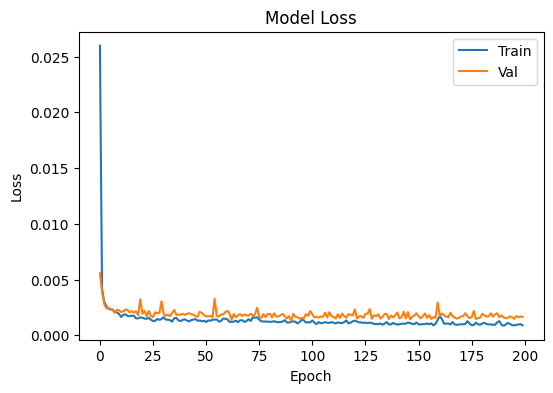

In [29]:
# Plotting the loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

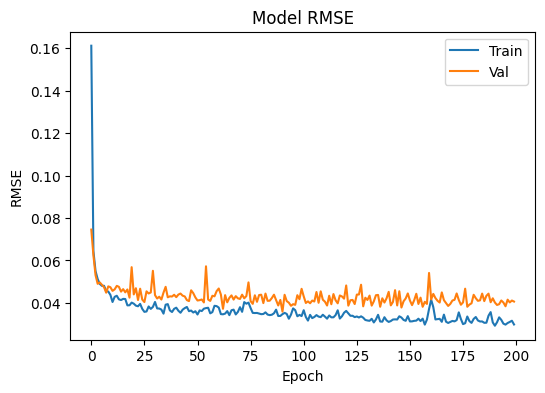

In [30]:
plt.figure(figsize=(6,4))
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [31]:
y_pred = model1.predict(X_Test)
rmse = RMSE()
rmse.update_state(y_Test,y_pred)
print('RMSE:',rmse.result().numpy())

4/4 [==============================] - 0s 8ms/step
RMSE: 0.045377538


In [32]:
model1.save('../Model/CHF_BasicMod.h5')

p:\Anaconda\envs\jupy\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Let's Perform Hyperparameter Tuning with Kfold Cross Validation using Keras Tuner

We will use k-fold cross validation to evaluate the model performance.

In [60]:
import keras_tuner as kt
from sklearn.model_selection import KFold

In [61]:
# model_builder function
def model_builder(hp):
    """Builds Model for Keras Tuner

    Args:
      hp: HyperParameters

    Returns:
      keras model: returns a compiled keras sequential model
    """
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=[6]))

    # Tune the number of units in the Dense layers
    for i in range(hp.Int('num_dense_layers', min_value=1, max_value=5, step=1)):
        model.add(keras.layers.Dense(units=hp.Int(f'dense_units_{i}', min_value=32, max_value=512, step=32), activation='relu'))

    model.add(keras.layers.Dense(1, activation='linear'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    metrics = [keras.metrics.RootMeanSquaredError(name="rmse")]
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.MeanSquaredError(),
                  metrics=metrics)
    
    return model

In [70]:
from keras.callbacks import EarlyStopping, TensorBoard

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# TensorBoard Callback
tensorboard = TensorBoard(log_dir='../model/tensorboard_logs')

In [71]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=10,
    directory='../model/tuner_logs'
)

In [72]:
# Create K-Fold Cross-Validation
K = 10  # Number of folds
kfold = KFold(n_splits=K, shuffle=True)

In [12]:
# Split the data for cross-validation
X_train_for_cv, X_testing, y_train_for_cv, y_testing = train_test_split(X, y, test_size=0.2, random_state=101, shuffle=True)

In [13]:
X_train_for_cv.shape, X_testing.shape, y_train_for_cv.shape, y_testing.shape

((1492, 6), (373, 6), (1492,), (373,))

In [75]:
# K-Fold Cross-Validation Loop
for train_index, val_index in kfold.split(X_train_for_cv, y_train_for_cv):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    Y_train, Y_val = y[train_index], y[val_index]

    # Hyperparameter tuning with Keras Tuner
    tuner.search(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, callbacks=[tensorboard, early_stopping])

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Test the best model
test_loss, test_rmse = best_model.evaluate(X_testing, y_testing)

print(f"Test Loss: {test_loss}, Test RMSE: {test_rmse}")

Trial 10 Complete [00h 00m 07s]
val_loss: 0.0011613734532147646

Best val_loss So Far: 0.0011613734532147646
Total elapsed time: 00h 01m 48s
12/12 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0465
Test Loss: 0.0021643303334712982, Test RMSE: 0.046522364020347595


In [76]:
best_model.save('../Model/CHF_hyperparam_tunned_mod2.h5')
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 6)                 0         
                                                                 
 dense (Dense)               (None, 384)               2688      
                                                                 
 dense_1 (Dense)             (None, 352)               135520    
                                                                 
 dense_2 (Dense)             (None, 1)                 353       
                                                                 
Total params: 138561 (541.25 KB)
Trainable params: 138561 (541.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


p:\Anaconda\envs\jupy\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hps.values)

{'num_dense_layers': 2, 'dense_units_0': 384, 'learning_rate': 0.01, 'dense_units_1': 352, 'dense_units_2': 480, 'dense_units_3': 160, 'dense_units_4': 512}


In [82]:
loadmodel = keras.models.load_model("../model/CHF_hyperparam_tunned_mod.h5") # Further tunning this version of our model ....
loadmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 6)                 0         
                                                                 
 dense (Dense)               (None, 320)               2240      
                                                                 
 dense_1 (Dense)             (None, 352)               112992    
                                                                 
 dense_2 (Dense)             (None, 128)               45184     
                                                                 
 dense_3 (Dense)             (None, 480)               61920     
                                                                 
 dense_4 (Dense)             (None, 1)                 481       
                                                                 
Total params: 222817 (870.38 KB)
Trainable params: 22281

### Final Model Retraining
While final training the model we use TEST split as Validation Split !

In [89]:
model_final = Sequential()
# adding first layer and using relu as an activation function
model_final.add(Dense(320, input_shape=(X_Train.shape[-1],), activation='relu'))
# adding second layer to the sequential model
model_final.add(Dense(352, activation='relu'))
# adding third layer
model_final.add(Dense(128, activation='relu'))
# Adding forth layer 
model_final.add(Dense(480, activation='relu'))
# Output layer with linear activation function
model_final.add(Dense(1, activation='linear'))

In [90]:
metrics = [keras.metrics.RootMeanSquaredError(name="rmse")]

### Compiling the model
### choosing an appropirate optimiser and loss function
model_final.compile(optimizer=keras.optimizers.Adam(0.005),
              loss='mean_squared_error',
              metrics=metrics)

In [91]:
# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# TensorBoard Callback
tensorboard = TensorBoard(log_dir='../model/tb_logs')

In [92]:
### Training the model
epochs = 300
batch_size = 32
history = model_final.fit(X_train_for_cv,y_train_for_cv, validation_data = (X_testing, y_testing), epochs=epochs, batch_size=batch_size, callbacks=[tensorboard,early_stopping])

Epoch 1/300


47/47 [==============================] - 2s 11ms/step - loss: 0.0291 - rmse: 0.1705 - val_loss: 0.0033 - val_rmse: 0.0574
Epoch 2/300
47/47 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0594 - val_loss: 0.0031 - val_rmse: 0.0553
Epoch 3/300
47/47 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0522 - val_loss: 0.0026 - val_rmse: 0.0512
Epoch 4/300
47/47 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0529 - val_loss: 0.0024 - val_rmse: 0.0492
Epoch 5/300
47/47 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0504 - val_loss: 0.0026 - val_rmse: 0.0509
Epoch 6/300
47/47 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0491 - val_loss: 0.0027 - val_rmse: 0.0519
Epoch 7/300
47/47 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0471 - val_loss: 0.0027 - val_rmse: 0.0521
Epoch 8/300
47/47 [==============================] - 0s 7ms/step - loss: 0.0027 

In [98]:
model_final.save('../model/CHF_FinalMod_.h5')

p:\Anaconda\envs\jupy\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


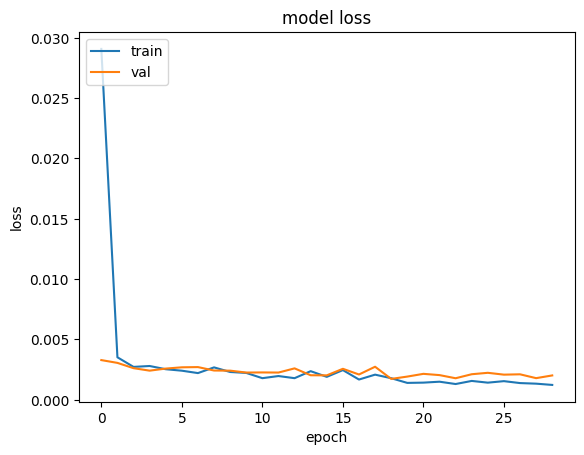

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

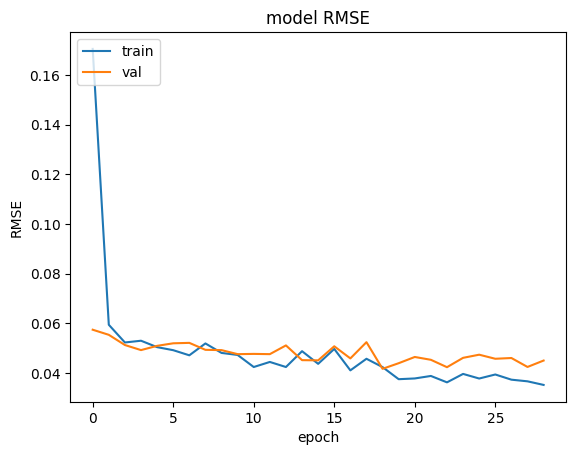

In [100]:
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [2]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

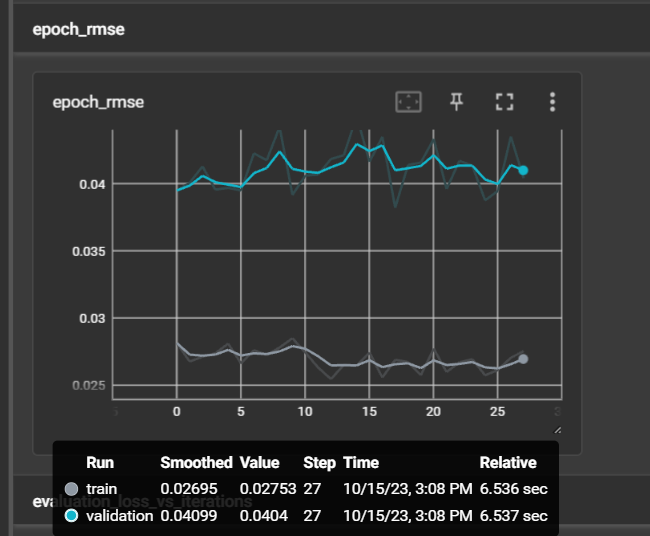

### Deploy testing

In [14]:
model = keras.models.load_model("../model/CHF_FinalMod_.h5")

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 320)               2240      
                                                                 
 dense_14 (Dense)            (None, 352)               112992    
                                                                 
 dense_15 (Dense)            (None, 128)               45184     
                                                                 
 dense_16 (Dense)            (None, 480)               61920     
                                                                 
 dense_17 (Dense)            (None, 1)                 481       
                                                                 
Total params: 222817 (870.38 KB)
Trainable params: 222817 (870.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
inp = X_testing.iloc[0].values.reshape(1,-1)

In [35]:
data_chf.describe()

,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
count,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000
mean,10.010949,2862.647721,0.016179,9.417212,16.167721,911.340483,3.854638
std,4.282715,1656.412247,0.117575,6.333807,21.182870,726.718974,1.985535
min,0.100000,0.000000,-0.866700,1.000000,1.000000,10.000000,0.800000
25%,6.890000,1519.000000,-0.048300,5.600000,5.600000,432.000000,2.400000
50%,10.340000,2590.000000,0.024400,8.500000,10.300000,625.000000,3.500000
75%,13.790000,3933.000000,0.100600,11.100000,15.200000,1778.000000,4.800000
max,20.680000,7975.000000,0.232000,37.500000,120.000000,3048.000000,19.300000


In [50]:
data_chf.iloc[1700]

pressure [MPa]            6.8600
mass_flux [kg/m2-s]    3052.0000
x_e_out [-]               0.0318
D_e [mm]                  4.6000
D_h [mm]                 11.3000
length [mm]            1778.0000
chf_exp [MW/m2]           2.7000
Name: 1700, dtype: float64

In [27]:
scaler = pickle.load(open("../model/scaler.pkl", "rb"))

In [37]:
processed_input = scaler.transform(data_chf.drop('x_e_out [-]',axis=1).iloc[0].values.reshape(1,-1))

C:\Users\maxxk\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
processed_input

array([[-2.24706269,  1.65302234, -1.01343991, -0.62178792, -1.11674267,
         3.75080625]])

In [39]:
y_pred = model.predict(processed_input)
y_pred

1/1 [==============================] - 0s 37ms/step


array([[-0.03491057]], dtype=float32)

In [52]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_testing)
rmse = np.sqrt(mean_squared_error(y_testing, y_pred))
rmse

12/12 [==============================] - 0s 2ms/step


0.041614476812936896

In [53]:
import shap 
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [59]:
explainer = shap.DeepExplainer(model, X_testing.values)
shap_values = explainer.shap_values(X_testing.values)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


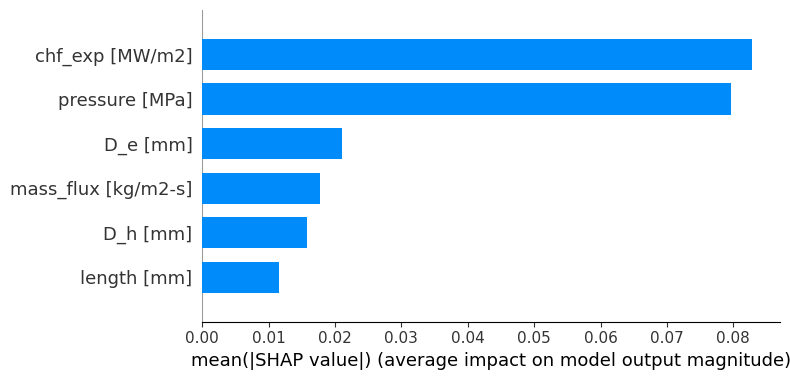

In [60]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names=X_testing.columns, max_display=20)

In [63]:
shap.force_plot(explainer.expected_value[0].numpy(), shap_values[0][0],feature_names=X_testing.columns)

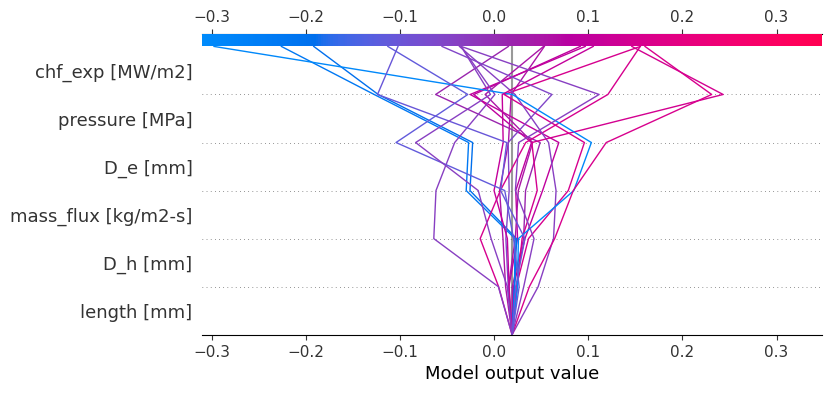

In [67]:
shap.decision_plot(explainer.expected_value[0].numpy(), shap_values[0][10:30], feature_names=X_testing.columns.to_list())

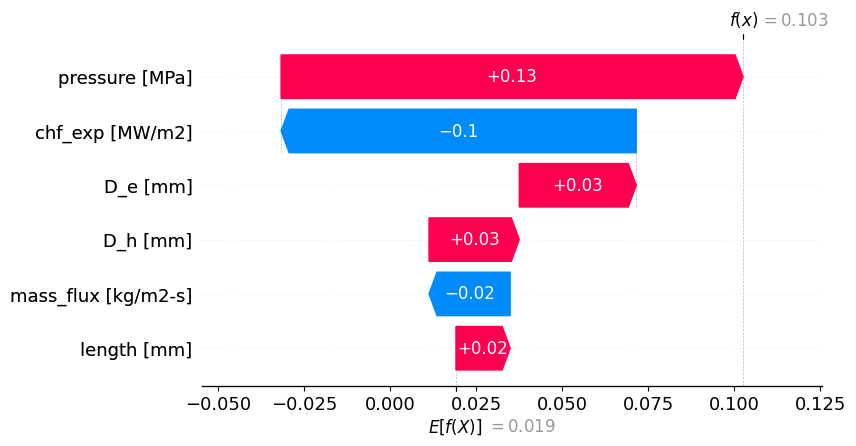

In [68]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][80], feature_names=X_testing.columns.to_list(), max_display=20)
